In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Cleaning and Setting up Data

In [2]:
#Import Data
temperature = pd.read_csv("city_temperature.csv")

#Drop irrelavant columns
temperature = temperature.drop(["State"], axis = 1)

#Drop irrelevant rows
index_temp = temperature[temperature["AvgTemperature"] == -99].index
temperature.drop(index_temp, inplace = True)

#Reducing the Memory Load
temperature["Region"]         = temperature["Region"].astype("category")
temperature["Month"]          = temperature["Month"].astype("category")
temperature["Year"]           = temperature["Year"].astype("category")
temperature["Day"]            = temperature["Day"].astype("category")
temperature["Country"]        = temperature["Country"].astype("category")
temperature["City"]           = temperature["City"].astype("category")

#First Glance
temperature.head()

C:\Users\Amey Joshi\AppData\Local\Temp\ipykernel_13052\1987601768.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temperature = pd.read_csv("city_temperature.csv")


Region  Country     City Month Day  Year  AvgTemperature
0  Africa  Algeria  Algiers     1   1  1995            64.2
1  Africa  Algeria  Algiers     1   2  1995            49.4
2  Africa  Algeria  Algiers     1   3  1995            48.8
3  Africa  Algeria  Algiers     1   4  1995            46.4
4  Africa  Algeria  Algiers     1   5  1995            47.9

In [3]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826655 entries, 0 to 2906326
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Region          category
 1   Country         category
 2   City            category
 3   Month           category
 4   Day             category
 5   Year            category
 6   AvgTemperature  float64 
dtypes: category(6), float64(1)
memory usage: 62.0 MB


In [4]:
#Adding the AvgTemperature_F Column
temperature["AvgTemperature_F"] = temperature["AvgTemperature"]

#Adding the AvgTemperature_C Column
temperature["AvgTemperature_C"] = round((temperature["AvgTemperature_F"]-32) * (5/9),2)

#Dropping the AvgTemperature Column
temperature.drop(["AvgTemperature"], axis = 1, inplace = True)

temperature.head()

Region  Country     City Month Day  Year  AvgTemperature_F  \
0  Africa  Algeria  Algiers     1   1  1995              64.2   
1  Africa  Algeria  Algiers     1   2  1995              49.4   
2  Africa  Algeria  Algiers     1   3  1995              48.8   
3  Africa  Algeria  Algiers     1   4  1995              46.4   
4  Africa  Algeria  Algiers     1   5  1995              47.9   

   AvgTemperature_C  
0             17.89  
1              9.67  
2              9.33  
3              8.00  
4              8.83

In [5]:
#Guage the Total Satisfaction Level
year = []
leap_counter = 0

for i in range(1995,2021):
    year.append(i)
    
for i in year:
    if (i%4 == 0) and (i%100 != 0):
        leap_counter += 1
    elif (i%100 == 0) and (i%400 == 0):
        leap_counter += 1

total_days         = leap_counter*366 + (len(year)-leap_counter)*365
total_entries      = total_days * 321
recd_entries       = temperature.shape[0]
gap                = total_entries - 2826655
data_efficiency    = round((gap/total_entries),2)

print(f'The total entries should be {total_entries}.')
print(f'The total entries recieved are {recd_entries}.')
print(f'The total gap in entries is {gap}.')

if data_efficiency < 0.05:
    print(f"Excellent Satisfaction Level. The Satisfaction Level is {data_efficiency}.")
elif 0.05 < data_efficiency < 0.1:
    print(f"Satisfactory Satisfaction Level. The Satisfaction Level is {data_efficiency}.")
else:
    print(f"Satisfaction Level not met. The Satisfaction Level is {data_efficiency}.")

The total entries should be 3048537.
The total entries recieved are 2826655.
The total gap in entries is 221882.
Satisfactory Satisfaction Level. The Satisfaction Level is 0.07.


#### Creating Excel Sheet

In [6]:
excel_file = pd.ExcelWriter("Mean_Temperature.xlsx")

#### Region Wise Average Temperature

In [7]:
temperature.value_counts("Region")

Region
North America                        1548160
Europe                                368702
Asia                                  306163
Africa                                220919
South/Central America & Carribean     206691
Middle East                           120811
Australia/South Pacific                55209
dtype: int64

In [8]:
region_list = temperature["Region"].drop_duplicates().tolist()
region_list

['Africa',
 'Asia',
 'Australia/South Pacific',
 'Europe',
 'Middle East',
 'North America',
 'South/Central America & Carribean']

In [9]:
mean_temp_region_list_f = []
for i in region_list:
    x = round(temperature[temperature["Region"] == i]["AvgTemperature_F"].mean(),2)
    mean_temp_region_list_f.append(x)
    
mean_temp_region_list_f

[74.4, 68.11, 62.3, 51.95, 73.84, 56.15, 72.2]

In [10]:
mean_temp_region_list_c = []
for i in region_list:
    x = round(temperature[temperature["Region"] == i]["AvgTemperature_C"].mean(),2)
    mean_temp_region_list_c.append(x)
    
mean_temp_region_list_c

[23.56, 20.06, 16.84, 11.08, 23.24, 13.42, 22.33]

In [11]:
data = {"Region":region_list, "MeanTemperature_F":mean_temp_region_list_f, "MeanTemperature_C":mean_temp_region_list_c}
mean_temp_region_df = pd.DataFrame.from_dict(data)
mean_temp_region_df

Region  MeanTemperature_F  MeanTemperature_C
0                             Africa              74.40              23.56
1                               Asia              68.11              20.06
2            Australia/South Pacific              62.30              16.84
3                             Europe              51.95              11.08
4                        Middle East              73.84              23.24
5                      North America              56.15              13.42
6  South/Central America & Carribean              72.20              22.33

In [12]:
mean_temp_region_df.to_excel(excel_file, sheet_name = "Region_Wise", index = False)

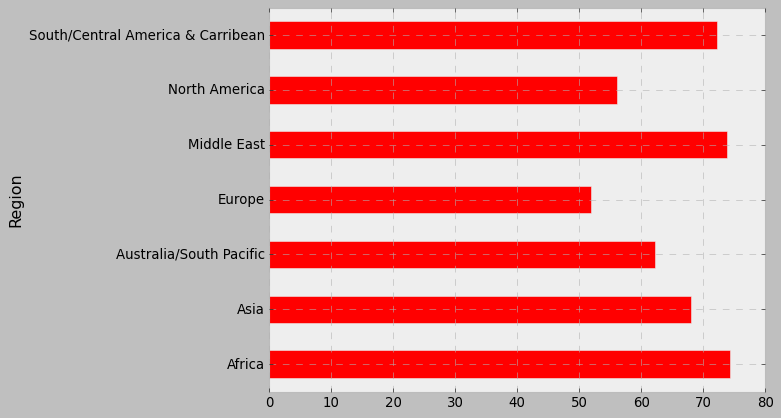

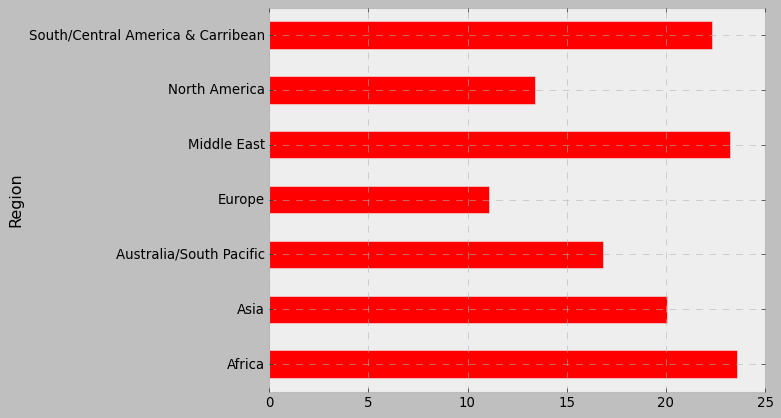

In [47]:
#Fahrenheit Image
plt.style.use("bmh")
mean_temp_region_df.plot(x = "Region", y = "MeanTemperature_F", kind = "barh", color = "red")
plt.legend().remove()
plt.savefig("Region_Mean_Temp_F.png", bbox_inches = "tight")

#Celcius Image
plt.style.use("bmh")
mean_temp_region_df.plot(x = "Region", y = "MeanTemperature_C", kind = "barh", color = "red")
plt.legend().remove()
plt.savefig("Region_Mean_Temp_C.png", bbox_inches = "tight")

#### Country Wise Average Temperature

In [13]:
temperature.value_counts("Country")

Country
US                   1450555
Canada                 73965
China                  46139
Australia              46002
India                  36903
                      ...   
Serbia-Montenegro       3247
Sierra Leone            3064
Malawi                  2641
Guyana                  2136
Burundi                  884
Length: 125, dtype: int64

In [14]:
country_list = temperature["Country"].drop_duplicates().tolist()
country_list

['Algeria',
 'Burundi',
 'Benin',
 'Central African Republic',
 'Congo',
 'Egypt',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'Ivory Coast',
 'Kenya',
 'Morocco',
 'Madagascar',
 'Mauritania',
 'Malawi',
 'Mozambique',
 'Namibia',
 'Nigeria',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Togo',
 'Tunisia',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Bangladesh',
 'China',
 'Hong Kong',
 'India',
 'Indonesia',
 'Japan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Laos',
 'Malaysia',
 'Mongolia',
 'Myanmar (Burma)',
 'Nepal',
 'North Korea',
 'Pakistan',
 'Philippines',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Turkmenistan',
 'Uzbekistan',
 'Vietnam',
 'Australia',
 'New Zealand',
 'Albania',
 'Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Georgia',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Macedonia',
 'The Netherlands',


In [15]:
mean_temp_country_list_f = []
for i in country_list:
    x = round(temperature[temperature["Country"] == i]["AvgTemperature_F"].mean(),2)
    mean_temp_country_list_f.append(x)
    
mean_temp_country_list_f

[64.37,
 73.69,
 81.71,
 78.82,
 78.17,
 72.68,
 62.95,
 79.88,
 79.02,
 81.59,
 82.34,
 80.25,
 67.49,
 63.38,
 65.45,
 78.11,
 70.03,
 74.74,
 69.33,
 83.99,
 76.33,
 81.72,
 62.53,
 81.5,
 67.09,
 79.22,
 72.59,
 70.09,
 78.72,
 60.64,
 75.63,
 80.54,
 83.37,
 56.35,
 49.88,
 53.47,
 81.06,
 82.3,
 30.32,
 81.9,
 66.04,
 51.87,
 75.94,
 82.36,
 82.24,
 53.4,
 81.45,
 73.89,
 60.74,
 83.92,
 63.79,
 60.53,
 75.41,
 62.78,
 59.93,
 61.14,
 51.47,
 45.39,
 51.51,
 51.62,
 54.41,
 67.97,
 48.08,
 47.4,
 42.67,
 55.38,
 49.94,
 56.34,
 65.25,
 51.57,
 41.52,
 49.53,
 57.73,
 45.37,
 54.74,
 51.3,
 41.8,
 48.25,
 62.63,
 52.84,
 45.77,
 50.24,
 51.97,
 59.96,
 45.61,
 50.46,
 48.17,
 51.74,
 54.53,
 81.22,
 70.25,
 64.73,
 80.56,
 70.31,
 82.97,
 82.96,
 80.25,
 63.77,
 55.68,
 83.24,
 42.54,
 69.07,
 62.92,
 78.57,
 71.6,
 81.18,
 45.51,
 81.07,
 71.98,
 56.42,
 72.9,
 75.85,
 79.72,
 69.36,
 66.86,
 83.35,
 85.35,
 71.66,
 81.79,
 81.02,
 67.09,
 79.69,
 61.62,
 81.13,
 56.63]

In [16]:
mean_temp_country_list_c = []
for i in country_list:
    x = round(temperature[temperature["Country"] == i]["AvgTemperature_C"].mean(),2)
    mean_temp_country_list_c.append(x)
    
mean_temp_country_list_c

[17.98,
 23.16,
 27.62,
 26.01,
 25.65,
 22.6,
 17.19,
 26.6,
 26.12,
 27.55,
 27.96,
 26.8,
 19.72,
 17.43,
 18.58,
 25.62,
 21.13,
 23.75,
 20.74,
 28.88,
 24.63,
 27.62,
 16.96,
 27.5,
 19.49,
 26.24,
 22.55,
 21.16,
 25.96,
 15.91,
 24.24,
 26.97,
 28.54,
 13.53,
 9.93,
 11.93,
 27.25,
 27.94,
 -0.93,
 27.72,
 18.91,
 11.04,
 24.41,
 27.98,
 27.91,
 11.89,
 27.47,
 23.27,
 15.97,
 28.84,
 17.66,
 15.85,
 24.12,
 17.1,
 15.51,
 16.19,
 10.82,
 7.44,
 10.84,
 10.9,
 12.45,
 19.98,
 8.93,
 8.56,
 5.93,
 12.99,
 9.97,
 13.52,
 18.47,
 10.87,
 5.29,
 9.74,
 14.29,
 7.43,
 12.63,
 10.72,
 5.44,
 9.03,
 17.01,
 11.58,
 7.65,
 10.13,
 11.09,
 15.53,
 7.56,
 10.25,
 8.98,
 10.97,
 12.52,
 27.34,
 21.25,
 18.18,
 26.98,
 21.28,
 28.31,
 28.31,
 26.81,
 17.65,
 13.16,
 28.47,
 5.86,
 20.59,
 17.18,
 25.87,
 22.0,
 27.32,
 7.5,
 27.26,
 22.21,
 13.57,
 22.72,
 24.36,
 26.51,
 20.76,
 19.37,
 28.53,
 29.64,
 22.03,
 27.66,
 27.23,
 19.49,
 26.5,
 16.45,
 27.29,
 13.69]

In [17]:
country_data = {"Country":country_list, "MeanTemperature_F":mean_temp_country_list_f, "MeanTemperature_C":mean_temp_country_list_c}
mean_temp_country_df = pd.DataFrame.from_dict(country_data)
mean_temp_country_df

Country  MeanTemperature_F  MeanTemperature_C
0                     Algeria              64.37              17.98
1                     Burundi              73.69              23.16
2                       Benin              81.71              27.62
3    Central African Republic              78.82              26.01
4                       Congo              78.17              25.65
..                        ...                ...                ...
120                      Peru              67.09              19.49
121                  Suriname              79.69              26.50
122                   Uruguay              61.62              16.45
123                 Venezuela              81.13              27.29
124                        US              56.63              13.69

[125 rows x 3 columns]

In [18]:
mean_temp_country_df.to_excel(excel_file, sheet_name = "Country_Wise", index = False)

#### City Wise Mean Temperature

In [19]:
temperature.value_counts("City")

City
Washington       18498
Washington DC    18498
Portland         18493
Charleston       18490
Columbus         18472
                 ...  
Lilongwe          2641
Frankfurt         2331
Georgetown        2136
Bonn              1083
Bujumbura          884
Length: 321, dtype: int64

In [20]:
city_list = temperature["City"].drop_duplicates().tolist()
city_list

['Algiers',
 'Bujumbura',
 'Cotonou',
 'Bangui',
 'Brazzaville',
 'Cairo',
 'Addis Ababa',
 'Libreville',
 'Banjul',
 'Conakry',
 'Bissau',
 'Abidjan',
 'Nairobi',
 'Rabat',
 'Antananarivo',
 'Nouakchott',
 'Lilongwe',
 'Maputo',
 'Windhoek',
 'Niamey',
 'Lagos',
 'Dakar',
 'Freetown',
 'Capetown',
 'Lome',
 'Tunis',
 'Dar Es Salaam',
 'Kampala',
 'Lusaka',
 'Dhaka',
 'Beijing',
 'Chengdu',
 'Guangzhou',
 'Shanghai',
 'Shenyang',
 'Hong Kong',
 'Bombay (Mumbai)',
 'Calcutta',
 'Chennai (Madras)',
 'Delhi',
 'Jakarta',
 'Osaka',
 'Sapporo',
 'Tokyo',
 'Almaty',
 'Bishkek',
 'Vientiane',
 'Kuala Lumpur',
 'Ulan-bator',
 'Rangoon',
 'Katmandu',
 'Pyongyang',
 'Islamabad',
 'Karachi',
 'Manila',
 'Singapore',
 'Seoul',
 'Colombo',
 'Taipei',
 'Dusanbe',
 'Bangkok',
 'Ashabad',
 'Tashkent',
 'Hanoi',
 'Brisbane',
 'Canberra',
 'Melbourne',
 'Perth',
 'Sydney',
 'Auckland',
 'Tirana',
 'Vienna',
 'Minsk',
 'Brussels',
 'Sofia',
 'Zagreb',
 'Nicosia',
 'Prague',
 'Copenhagen',
 'Helsinki',
 '

In [21]:
mean_temp_city_list_f = []
for i in city_list:
    x = round(temperature[temperature["City"] == i]["AvgTemperature_F"].mean(),2)
    mean_temp_city_list_f.append(x)
    
mean_temp_city_list_f

[64.37,
 73.69,
 81.71,
 78.82,
 78.17,
 72.68,
 62.95,
 79.88,
 79.02,
 81.59,
 82.34,
 80.25,
 67.49,
 63.38,
 65.45,
 78.11,
 70.03,
 74.74,
 69.33,
 85.96,
 81.01,
 76.33,
 81.72,
 62.53,
 81.5,
 67.09,
 79.22,
 72.59,
 70.09,
 78.72,
 55.2,
 63.6,
 73.41,
 63.45,
 47.52,
 75.63,
 82.12,
 79.66,
 83.42,
 76.94,
 83.37,
 62.56,
 44.91,
 61.57,
 49.88,
 53.47,
 81.06,
 82.3,
 30.32,
 81.9,
 66.04,
 51.87,
 71.49,
 80.28,
 82.36,
 82.24,
 53.4,
 81.45,
 73.89,
 60.74,
 83.92,
 63.79,
 60.53,
 75.41,
 68.72,
 56.4,
 65.36,
 65.32,
 58.13,
 59.93,
 61.14,
 51.47,
 45.39,
 51.51,
 51.62,
 54.41,
 67.97,
 48.08,
 47.4,
 42.67,
 53.93,
 56.82,
 51.81,
 52.41,
 50.82,
 48.77,
 56.34,
 65.25,
 51.57,
 41.52,
 49.53,
 54.73,
 60.72,
 45.37,
 54.74,
 51.3,
 41.8,
 48.25,
 62.63,
 52.84,
 42.4,
 55.52,
 50.24,
 51.97,
 61.79,
 59.17,
 58.92,
 45.61,
 49.84,
 51.87,
 49.67,
 48.17,
 50.63,
 52.84,
 54.53,
 81.22,
 70.25,
 64.73,
 80.56,
 70.31,
 82.97,
 82.96,
 81.17,
 79.34,
 63.77,
 51.39,
 59

In [22]:
mean_temp_city_list_c = []
for i in city_list:
    x = round(temperature[temperature["City"] == i]["AvgTemperature_C"].mean(),2)
    mean_temp_city_list_c.append(x)
    
mean_temp_city_list_c

[17.98,
 23.16,
 27.62,
 26.01,
 25.65,
 22.6,
 17.19,
 26.6,
 26.12,
 27.55,
 27.96,
 26.8,
 19.72,
 17.43,
 18.58,
 25.62,
 21.13,
 23.75,
 20.74,
 29.98,
 27.23,
 24.63,
 27.62,
 16.96,
 27.5,
 19.49,
 26.24,
 22.55,
 21.16,
 25.96,
 12.89,
 17.56,
 23.0,
 17.47,
 8.62,
 24.24,
 27.84,
 26.48,
 28.57,
 24.97,
 28.54,
 16.98,
 7.17,
 16.43,
 9.93,
 11.93,
 27.25,
 27.94,
 -0.93,
 27.72,
 18.91,
 11.04,
 21.94,
 26.82,
 27.98,
 27.91,
 11.89,
 27.47,
 23.27,
 15.97,
 28.84,
 17.66,
 15.85,
 24.12,
 20.4,
 13.56,
 18.53,
 18.51,
 14.51,
 15.51,
 16.19,
 10.82,
 7.44,
 10.84,
 10.9,
 12.45,
 19.98,
 8.93,
 8.56,
 5.93,
 12.18,
 13.79,
 11.01,
 11.34,
 10.46,
 9.32,
 13.52,
 18.47,
 10.87,
 5.29,
 9.74,
 12.63,
 15.96,
 7.43,
 12.63,
 10.72,
 5.44,
 9.03,
 17.01,
 11.58,
 5.78,
 13.07,
 10.13,
 11.09,
 16.55,
 15.1,
 14.95,
 7.56,
 9.91,
 11.04,
 9.82,
 8.98,
 10.35,
 11.58,
 12.52,
 27.34,
 21.25,
 18.18,
 26.98,
 21.28,
 28.31,
 28.31,
 27.31,
 26.3,
 17.65,
 10.77,
 15.54,
 28.26,
 28

In [23]:
city_data = {"City":city_list, "MeanTemperature_F":mean_temp_city_list_f, "MeanTemperature_C":mean_temp_city_list_c}
mean_temp_city_df = pd.DataFrame.from_dict(city_data)
mean_temp_city_df

City  MeanTemperature_F  MeanTemperature_C
0                 Algiers              64.37              17.98
1               Bujumbura              73.69              23.16
2                 Cotonou              81.71              27.62
3                  Bangui              78.82              26.01
4             Brazzaville              78.17              25.65
..                    ...                ...                ...
316               Madison              47.58               8.66
317             Milwaukee              48.55               9.19
318                Casper              45.94               7.74
319              Cheyenne              46.69               8.16
320  San Juan Puerto Rico              79.86              26.59

[321 rows x 3 columns]

In [24]:
mean_temp_city_df.to_excel(excel_file, sheet_name = "City_Wise", index = False)
excel_file.save()

C:\Users\Amey Joshi\AppData\Local\Temp\ipykernel_13052\3640337955.py:2: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()
